In [36]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [37]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
!pip install citipy

In [38]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [39]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [40]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [41]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [42]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [43]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [44]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [45]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 12 | ushuaia
Processing Record 2 of Set 12 | mataura
Processing Record 3 of Set 12 | sur
Processing Record 4 of Set 12 | yellowknife
Processing Record 5 of Set 12 | mount gambier
Processing Record 6 of Set 12 | qaanaaq
Processing Record 7 of Set 12 | hirna
Processing Record 8 of Set 12 | cape town
Processing Record 9 of Set 12 | la palma
Processing Record 10 of Set 12 | altay
Processing Record 11 of Set 12 | bluff
Processing Record 12 of Set 12 | esperance
Processing Record 13 of Set 12 | eureka
Processing Record 14 of Set 12 | lebu
Processing Record 15 of Set 12 | skegness
Processing Record 16 of Set 12 | jamestown
Processing Record 17 of Set 12 | thompson
Processing Record 18 of Set 12 | port elizabeth
Processing Record 19 of Set 12 | carnarvon
Processing Record 20 of Set 12 | udachnyy
Processing Record 21 of Set 12 | barentsburg
Processing Record 22 of Set 12 | bengkulu
Processing Record 23 of Set 12 | abha
Processing Record 24 of Set 12 | katsuura
Process

In [47]:
# Run an API request for each of the cities.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1  
    
    
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 44 of Set 23 | ushuaia
Processing Record 45 of Set 23 | mataura
Processing Record 46 of Set 23 | sur
Processing Record 47 of Set 23 | yellowknife
Processing Record 48 of Set 23 | mount gambier
Processing Record 49 of Set 23 | qaanaaq
Processing Record 50 of Set 23 | hirna
Processing Record 51 of Set 23 | cape town
Processing Record 52 of Set 23 | la palma
Processing Record 53 of Set 23 | altay
Processing Record 54 of Set 23 | bluff
Processing Record 55 of Set 23 | esperance
Processing Record 56 of Set 23 | eureka
Processing Record 57 of Set 23 | lebu
Processing Record 58 of Set 23 | skegness
Processing Record 59 of Set 23 | jamestown
Processing Record 60 of Set 23 | thompson
Processing Record 61 of Set 23 | port elizabeth
Processing Record 62 of Set 23 | carnarvon
Processing Record 63 of Set 23 | udachnyy
Processing Record 64 of Set 23 | barentsburg
City not found. Skipping...
Processing Record 65 of Set 23 | bengkulu
Processing Record 66 of Set 23 | abha
Processing R

Processing Record 33 of Set 26 | dingle
Processing Record 34 of Set 26 | puerto ayora
Processing Record 35 of Set 26 | chalmette
Processing Record 36 of Set 26 | sciacca
Processing Record 37 of Set 26 | guerrero negro
Processing Record 38 of Set 26 | namibe
Processing Record 39 of Set 26 | phrai bung
City not found. Skipping...
Processing Record 40 of Set 26 | fairbanks
Processing Record 41 of Set 26 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 26 | verin
Processing Record 43 of Set 26 | dikson
Processing Record 44 of Set 26 | castro
Processing Record 45 of Set 26 | new norfolk
Processing Record 46 of Set 26 | cheuskiny
City not found. Skipping...
Processing Record 47 of Set 26 | chuy
Processing Record 48 of Set 26 | kokoda
Processing Record 49 of Set 26 | bogatyye saby
Processing Record 50 of Set 26 | kazachinskoye
Processing Record 1 of Set 27 | maniitsoq
Processing Record 2 of Set 27 | havoysund
Processing Record 3 of Set 27 | rio gallegos
Processing Record 4 of

Processing Record 17 of Set 30 | loandjili
Processing Record 18 of Set 30 | tabou
Processing Record 19 of Set 30 | hueyapan
Processing Record 20 of Set 30 | chernyshevskiy
Processing Record 21 of Set 30 | cartagena del chaira
Processing Record 22 of Set 30 | itoman
Processing Record 23 of Set 30 | kupang
Processing Record 24 of Set 30 | pisco
Processing Record 25 of Set 30 | makakilo city
Processing Record 26 of Set 30 | palera
Processing Record 27 of Set 30 | dovers
Processing Record 28 of Set 30 | ust-kamchatsk
City not found. Skipping...
Processing Record 29 of Set 30 | horsham
Processing Record 30 of Set 30 | samusu
City not found. Skipping...
Processing Record 31 of Set 30 | fortuna
Processing Record 32 of Set 30 | tiznit
Processing Record 33 of Set 30 | aqtobe
Processing Record 34 of Set 30 | san ignacio
Processing Record 35 of Set 30 | malwan
City not found. Skipping...
Processing Record 36 of Set 30 | chicama
Processing Record 37 of Set 30 | mangai
Processing Record 38 of Set 3

Processing Record 3 of Set 34 | arlit
Processing Record 4 of Set 34 | chuguyevka
Processing Record 5 of Set 34 | nadym
Processing Record 6 of Set 34 | iqaluit
Processing Record 7 of Set 34 | panalingaan
Processing Record 8 of Set 34 | gosainganj
Processing Record 9 of Set 34 | sakakah
Processing Record 10 of Set 34 | berlevag
Processing Record 11 of Set 34 | wahiawa
Processing Record 12 of Set 34 | wexford
Processing Record 13 of Set 34 | husavik
Processing Record 14 of Set 34 | knysna
Processing Record 15 of Set 34 | kudahuvadhoo
Processing Record 16 of Set 34 | fuxin
Processing Record 17 of Set 34 | rovaniemi
Processing Record 18 of Set 34 | abu zabad
Processing Record 19 of Set 34 | buchanan
Processing Record 20 of Set 34 | kirakira
Processing Record 21 of Set 34 | shepsi
Processing Record 22 of Set 34 | wuning
Processing Record 23 of Set 34 | paraiso
Processing Record 24 of Set 34 | havelock
Processing Record 25 of Set 34 | rawson
Processing Record 26 of Set 34 | sarata
Processing 

In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.06,46,40,21.85,AR,2021-06-20 18:08:43
1,Mataura,-46.1927,168.8643,38.59,99,34,2.44,NZ,2021-06-20 18:08:59
2,Sur,22.5667,59.5289,88.99,58,34,10.83,OM,2021-06-20 18:08:59
3,Yellowknife,62.4560,-114.3525,53.56,50,60,8.99,CA,2021-06-20 18:08:40
4,Mount Gambier,-37.8333,140.7667,33.71,100,2,5.75,AU,2021-06-20 18:09:00
5,Qaanaaq,77.4840,-69.3632,39.49,56,0,1.45,GL,2021-06-20 18:09:00
6,Hirna,9.2167,41.1000,63.21,79,71,12.03,ET,2021-06-20 18:09:00
7,Cape Town,-33.9258,18.4232,71.10,22,33,7.49,ZA,2021-06-20 18:06:29
8,La Palma,33.8464,-118.0467,94.73,68,1,1.99,US,2021-06-20 18:09:01
9,Altay,47.8667,88.1167,51.53,55,100,10.33,CN,2021-06-20 18:09:02


In [52]:
titles = list(city_data_df.columns)
titles

['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed',
 'Country',
 'Date']

In [53]:
titles[1],titles[2],titles[3],titles[4],titles[5],titles[6],titles[7],titles[8]= titles[7],titles[8],titles[1],titles[2],titles[3],titles[4],titles[5],titles[6]
titles

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [54]:
city_data_df=city_data_df[titles]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-06-20 18:08:43,-54.8000,-68.3000,46.06,46,40,21.85
1,Mataura,NZ,2021-06-20 18:08:59,-46.1927,168.8643,38.59,99,34,2.44
2,Sur,OM,2021-06-20 18:08:59,22.5667,59.5289,88.99,58,34,10.83
3,Yellowknife,CA,2021-06-20 18:08:40,62.4560,-114.3525,53.56,50,60,8.99
4,Mount Gambier,AU,2021-06-20 18:09:00,-37.8333,140.7667,33.71,100,2,5.75
...,...,...,...,...,...,...,...,...,...
539,Marzuq,YE,2021-06-20 18:12:27,14.4000,46.4667,79.81,47,92,6.89
540,Beloha,MG,2021-06-20 18:12:27,-25.1667,45.0500,64.11,77,17,15.55
541,Jalu,LY,2021-06-20 18:12:27,29.0331,21.5482,87.57,22,0,7.18
542,Mahon,ES,2021-06-20 18:12:28,39.8885,4.2658,73.96,88,20,13.80


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

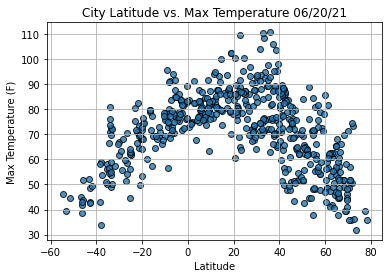

In [57]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

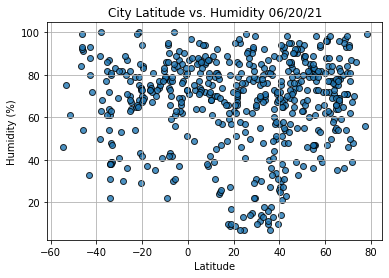

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

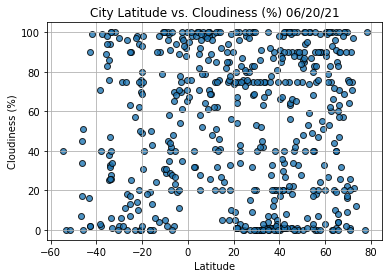

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

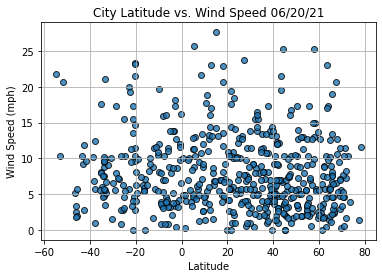

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()